In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def perspective_if_only_one_card(file_name):
    ## contour를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contour, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # contour를 바탕으로 사각형의 좌표를 찾는 작업
    rect = cv2.minAreaRect(contour[0])
    box = cv2.boxPoints(rect)
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    
    # If card is horizontally oriented
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp

    # If card is vertically oriented
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

In [3]:
def perspective_if_only_one_card_save(file_name):
    ## contour를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # contour를 바탕으로 사각형의 좌표를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    img2 = image.copy()
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
        img2 = cv2.drawContours(img2, [box], -1, (0, 0, 255), 5)

    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    
    # If card is horizontally oriented
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp

    # If card is vertically oriented
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp

In [50]:
data_loc = '../big_au/sample2'
filelist = os.listdir(data_loc)

In [51]:
for i in range(len(filelist)):
    warp = perspective_if_only_one_card_save(data_loc+'/'+filelist[i])
    cv2.imwrite("../big_au/resample2/"+filelist[i], cv2.cvtColor(warp, cv2.COLOR_RGB2BGR))

In [23]:
warp

array([[[ 78,  78,  78],
        [119, 119, 119],
        [109, 109, 109],
        ...,
        [109, 109, 109],
        [124, 124, 124],
        [ 67,  67,  67]],

       [[114, 114, 114],
        [193, 193, 193],
        [209, 209, 209],
        ...,
        [206, 206, 206],
        [193, 193, 193],
        [ 96,  96,  96]],

       [[ 95,  95,  95],
        [192, 192, 192],
        [239, 239, 239],
        ...,
        [239, 239, 239],
        [200, 200, 200],
        [ 85,  85,  85]],

       ...,

       [[ 93,  93,  93],
        [196, 196, 196],
        [234, 234, 234],
        ...,
        [236, 236, 236],
        [200, 200, 200],
        [106, 106, 106]],

       [[128, 128, 128],
        [191, 191, 191],
        [202, 202, 202],
        ...,
        [204, 204, 204],
        [180, 180, 180],
        [125, 125, 125]],

       [[ 82,  82,  82],
        [103, 103, 103],
        [ 88,  88,  88],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [ 86,  86,  86]]

In [4]:
data_loc = '../big_au/sample1'
filelist = os.listdir(data_loc)

In [5]:
for i in range(len(filelist)):
    warp = perspective_if_only_one_card_save(data_loc+'/'+filelist[i])
    cv2.imwrite("../big_au/resample1/"+filelist[i], cv2.cvtColor(warp, cv2.COLOR_RGB2BGR))

In [ ]:
perspective_if_only_one_card(C10_0_5343.jpg)

In [9]:
perspective_if_only_one_card(data_loc+'/'+filelist[0])

In [33]:
warp_img, rect = perspective_if_only_one_card('../big_au/sample2/C10_0_5434.jpg')

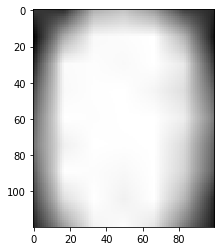

In [35]:
plt.imshow(warp_img,cmap="gray")

In [29]:
warp_img, rect = perspective_if_only_one_card('../big_au/sample2/C8_0_1059.jpg')

In [30]:
rect

array([[ 47.10167 ,  36.441406],
       [146.76472 ,  42.941193],
       [138.95906 , 162.62778 ],
       [ 39.296005, 156.12799 ]], dtype=float32)

In [36]:
file_name = '../big_au/sample2/C10_0_5434.jpg'

In [37]:
## contour를 찾는 작업
tresh_min = 100
tresh_max = 255
image = cv2.imread(file_name)
im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
contour, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# contour를 바탕으로 사각형의 좌표를 찾는 작업
rect = cv2.minAreaRect(contour[0])
box = cv2.boxPoints(rect)
temp_rect = np.array(box, dtype = "float32")
temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]

# If card is horizontally oriented
if temp_rect[0][0]>temp_rect[1][0]:
    temp = temp_rect[0].copy()
    temp_rect[0] = temp_rect[1]
    temp_rect[1] = temp

# If card is vertically oriented
if temp_rect[2][0]<temp_rect[3][0]:
    temp = temp_rect[2].copy()
    temp_rect[2] = temp_rect[3]
    temp_rect[3] = temp

# wrapPerspective 하는 작업
maxWidth = 100
maxHeight = 120
dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
M = cv2.getPerspectiveTransform(temp_rect,dst)
warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)


In [39]:
contour

[array([[[127, 161]],
 
        [[126, 162]],
 
        [[126, 164]],
 
        [[125, 165]],
 
        [[125, 166]],
 
        [[126, 167]],
 
        [[126, 169]],
 
        [[130, 169]],
 
        [[130, 166]],
 
        [[131, 165]],
 
        [[130, 164]],
 
        [[130, 162]],
 
        [[129, 161]]], dtype=int32), array([[[ 45,  50]],
 
        [[ 45,  72]],
 
        [[ 44,  73]],
 
        [[ 44,  97]],
 
        [[ 43,  98]],
 
        [[ 43, 122]],
 
        [[ 42, 123]],
 
        [[ 42, 147]],
 
        [[ 41, 148]],
 
        [[ 41, 169]],
 
        [[105, 169]],
 
        [[104, 169]],
 
        [[103, 168]],
 
        [[103, 167]],
 
        [[102, 166]],
 
        [[102, 165]],
 
        [[103, 164]],
 
        [[103, 163]],
 
        [[104, 162]],
 
        [[104, 161]],
 
        [[100, 161]],
 
        [[ 99, 160]],
 
        [[ 98, 160]],
 
        [[ 96, 158]],
 
        [[ 96, 157]],
 
        [[ 95, 156]],
 
        [[ 95, 154]],
 
        [[ 96, 153]],
 
    

In [41]:
rects = [cv2.minAreaRect(each) for each in contour]

In [42]:
rects

[((128.0, 165.0), (6.0, 8.0), -0.0),
 ((92.43370056152344, 111.1573486328125),
  (119.70426940917969, 99.84014892578125),
  -87.70938873291016)]

In [13]:
import shutil
shutil.copytree('./big_augmentation/resample', './big_augmentation/resample-copy')

'./big_augmentation/resample-copy'

In [8]:
for file in os.listdir('./big_augmentation/resample-copy'):
    print(file)
    break

C10_0_2258.jpg


In [27]:
tmp = 0
for file in os.listdir('./big_augmentation/resample-copy'):
    if ((tmp%2)==1.0):
        shutil.move('./big_augmentation/resample-copy/'+file, './big_augmentation/resample_odd/')
    tmp += 1

In [22]:
os.listdir('./big_augmentation/resample-copy')

['C10_0_2258.jpg',
 'C10_0_3176.jpg',
 'C10_0_5629.jpg',
 'C10_0_66.jpg',
 'C10_0_6877.jpg',
 'C10_0_8322.jpg',
 'C10_0_9612.jpg',
 'C2_0_1668.jpg',
 'C2_0_2019.jpg',
 'C2_0_403.jpg',
 'C2_0_57.jpg',
 'C2_0_6267.jpg',
 'C2_0_6378.jpg',
 'C2_0_8786.jpg',
 'C2_0_9901.jpg',
 'C3_0_1267.jpg',
 'C3_0_3217.jpg',
 'C3_0_4047.jpg',
 'C3_0_4296.jpg',
 'C3_0_5623.jpg',
 'C3_0_6840.jpg',
 'C3_0_7070.jpg',
 'C3_0_8493.jpg',
 'C4_0_2490.jpg',
 'C4_0_2878.jpg',
 'C4_0_3942.jpg',
 'C4_0_614.jpg',
 'C4_0_6374.jpg',
 'C4_0_6533.jpg',
 'C4_0_7608.jpg',
 'C4_0_9176.jpg',
 'C5_0_2375.jpg',
 'C5_0_2642.jpg',
 'C5_0_3346.jpg',
 'C5_0_3505.jpg',
 'C5_0_3658.jpg',
 'C5_0_6796.jpg',
 'C5_0_6805.jpg',
 'C5_0_8491.jpg',
 'C6_0_1626.jpg',
 'C6_0_3170.jpg',
 'C6_0_3919.jpg',
 'C6_0_7200.jpg',
 'C6_0_7383.jpg',
 'C6_0_8018.jpg',
 'C6_0_817.jpg',
 'C6_0_8671.jpg',
 'C7_0_146.jpg',
 'C7_0_2558.jpg',
 'C7_0_3545.jpg',
 'C7_0_403.jpg',
 'C7_0_5584.jpg',
 'C7_0_6382.jpg',
 'C7_0_6577.jpg',
 'C7_0_9648.jpg',
 'C8_0_1059.

In [17]:
tmp/2

208.0